***Iris  Flowers Classification***

***Importing Libraries***

In [79]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


***Data Preprocessing***

In [42]:
df=pd.read_csv('Iris.csv')
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [43]:
#displaying first 10 rows
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [44]:
#to display shape 
df.shape

(150, 5)

In [45]:
#finding null values 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [46]:
#Checking for dupllicated values
df.duplicated().sum()

3

In [47]:
#to check data types 
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [48]:
#lets group the Species
data=df.groupby('species')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [49]:
#to check unique values
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
#checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


***Data Visualization***

Text(0.5, 1.0, 'Outliners In Sepal Length')

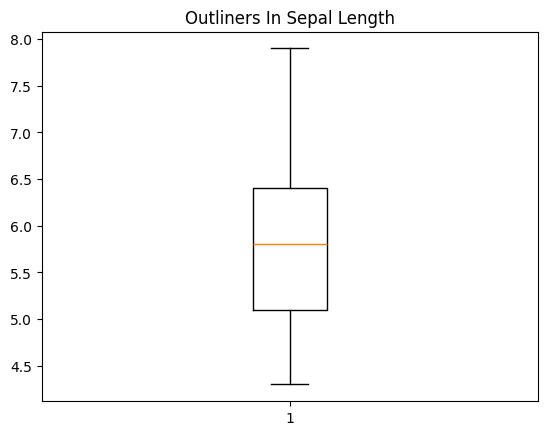

In [51]:
#checking for Outliners
plt.boxplot(df['sepal_length'])
plt.title('Outliners In Sepal Length')

Text(0.5, 1.0, 'Outliners In Sepal Width')

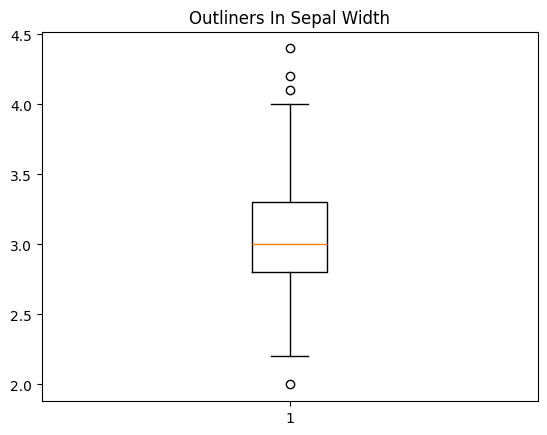

In [52]:
plt.boxplot(df['sepal_width'])
plt.title('Outliners In Sepal Width')

Text(0.5, 1.0, 'Outliners In Petal Length')

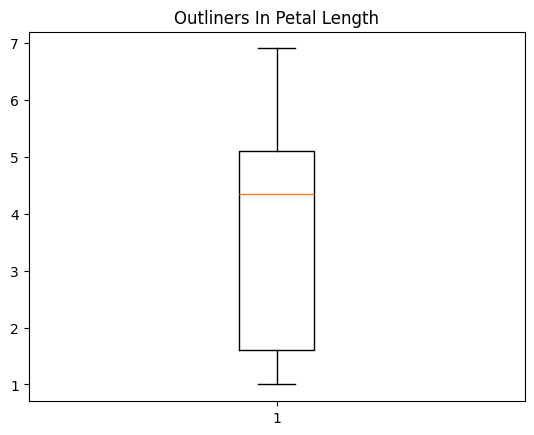

In [53]:
plt.boxplot(df['petal_length'])
plt.title('Outliners In Petal Length')

Text(0.5, 1.0, 'Outliners In Petal Width')

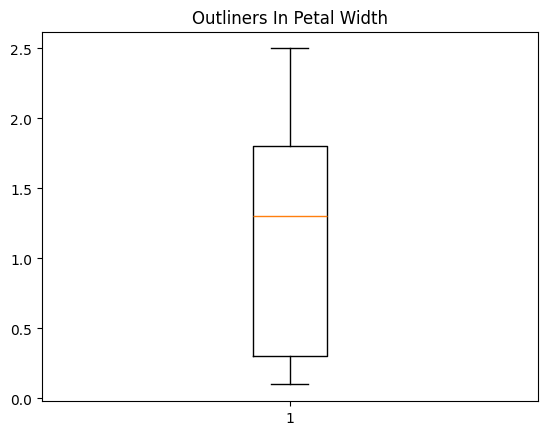

In [54]:
plt.boxplot(df['petal_width'])
plt.title('Outliners In Petal Width')

* From the above boxplot we conclude that there are outliners insepal width and 
* there is no outliners in sepal length, petal length and petal width

***Data Preparation***

In [55]:
#dropping the duplicated values
df.drop_duplicates(inplace=True)

In [56]:
#lets assign number for species for our better understanding
s={'Iris-setosa':1,'Iris-versicolor':2, 'Iris-virginica':3}

In [57]:
#renaming the species vallues names
df.species=[s[i] for i in df.species]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [60]:
#declaring x values

x=df.iloc[:,0:4]


In [61]:
#declaring y values
y=df.iloc[:,4]

In [63]:
#splitting the data 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33, random_state=42)

***Training the Model***

In [64]:
model=LinearRegression()


In [65]:
model.fit(x,y)
model.score(x,y)

0.9290542032204261

In [66]:
#coefficient values
model.coef_

array([-0.10337239, -0.04435561,  0.22423885,  0.61045661])

#intercept values
model.intercept_

***Making Prediction***

In [70]:
#predictions
ypred=model.predict(xtest)
ypred

array([2.5960638 , 2.18209289, 3.05284596, 0.98585471, 2.59154727,
       0.90783571, 2.33800407, 1.0336309 , 2.54246416, 0.91548679,
       1.09740374, 1.86824056, 2.68103667, 2.01836932, 3.08088823,
       2.34837852, 0.96867904, 2.09789165, 2.57217379, 1.00929358,
       1.01519525, 2.79038687, 0.98780644, 2.98911414, 1.89957659,
       0.87324694, 2.37491747, 3.00498289, 2.39559195, 0.99598689,
       2.69515982, 0.98068472, 2.77871244, 0.92777849, 0.92159352,
       2.5620778 , 2.83295859, 2.98533204, 1.13659591, 0.96660532,
       0.89823289, 3.04299605, 2.18909051, 2.8590064 , 2.1763132 ,
       2.11417159, 3.04429915, 2.71278281, 0.91569185])

***Model Evolution***

In [73]:
print('Mean Squared Error is: ' ,np.mean((ypred-ytest)**2))

Mean Squared Error is:  0.045029764808252624


***Using Random Forest Classifier***

In [81]:
# make our model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=200)
forest = RandomForestClassifier(random_state=42)
# fit our model
log.fit(xtrain,ytrain)
forest.fit(xtrain,ytrain)


RandomForestClassifier(random_state=42)

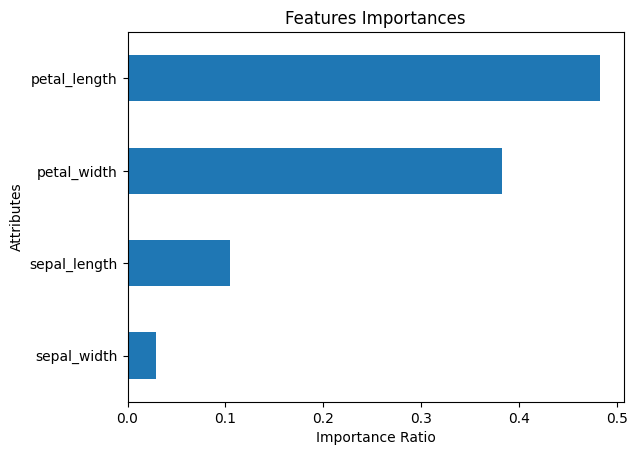

In [84]:
features = xtrain.columns
# Extract importances from model
importances = forest.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail().plot(kind='barh')
plt.xlabel('Importance Ratio')
plt.ylabel('Attributes')
plt.title('Features Importances');